In [623]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.stats import chi2_contingency
from scipy.stats import ttest_1samp
from scipy.stats import ttest_rel





In [624]:
# Read file

df = pd.read_csv('bank-full.csv', sep=';', quotechar='"')


In [625]:
# df.replace('unknown', np.nan, inplace=True)

In [626]:
df.info() # job, education, contact, poutcome have 'unknown' values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [627]:
df.y.value_counts() # data is imbalanced

y
no     39922
yes     5289
Name: count, dtype: int64

Text(0.5, 1.0, 'Target distribution')

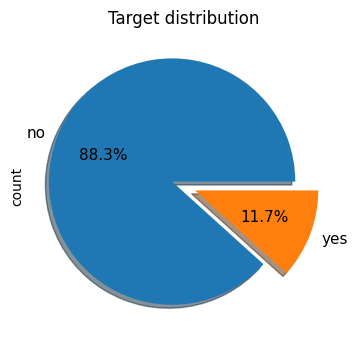

In [628]:
# Plotting imbalancy
plt.figure(figsize=(4,4))

df['y'].value_counts().plot.pie(explode=[0.1,0.1], autopct='%1.1f%%', 
    shadow=True, textprops={'fontsize':11}).set_title("Target distribution")

In [629]:
df.isin(['unknown']).sum()

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
dtype: int64

Text(0.5, 0, 'Values')

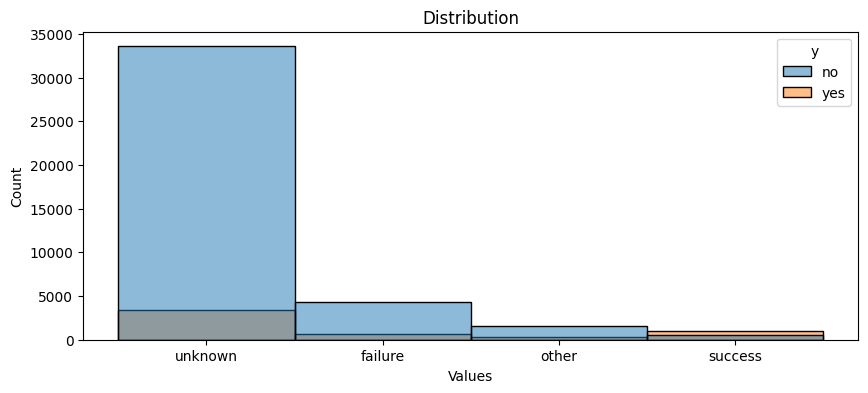

In [630]:
# After checking the poutcome target distribution, I saw that 'success' value may have important information
plt.figure(figsize=(10,4))

# Histogram
sns.histplot(data=df, x='poutcome', hue='y', binwidth=1)

# Aesthetics
plt.title('Distribution')
plt.xlabel('Values')

In [631]:
# Although ‘poutcome’ has more than 80 percent unknown values, when ‘poutcome’ equals ‘success’,
# there is a huge number of yes targets; so, we cannot drop it from the dataset.
counts = df.groupby(['poutcome', 'y']).size()
totals = df.groupby('poutcome').size()
poutcome_percentages = (counts / totals).reset_index(name='percentage')
poutcome_percentages


,poutcome,y,percentage
0,failure,no,0.873903
1,failure,yes,0.126097
2,other,no,0.833152
3,other,yes,0.166848
4,success,no,0.352747
5,success,yes,0.647253
6,unknown,no,0.908385
7,unknown,yes,0.091615


In [632]:
# The same goes for 'unknown' values of contact
counts = df.groupby(['contact', 'y']).size()
totals = df.groupby('contact').size()
poutcome_percentages = (counts / totals).reset_index(name='percentage')
poutcome_percentages

,contact,y,percentage
0,cellular,no,0.850811
1,cellular,yes,0.149189
2,telephone,no,0.865795
3,telephone,yes,0.134205
4,unknown,no,0.959293
5,unknown,yes,0.040707


In [633]:
# Checking other columns; you can change column_name to see other columns
column_name = 'default'
counts = df.groupby([column_name, 'y']).size()
totals = df.groupby(column_name).size()
poutcome_percentages = (counts / totals).reset_index(name='percentage')
poutcome_percentages

,default,y,percentage
0,no,no,0.882039
1,no,yes,0.117961
2,yes,no,0.936196
3,yes,yes,0.063804


In [634]:
# getting information of numerical values of the dataset
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


<Axes: xlabel='age', ylabel='Count'>

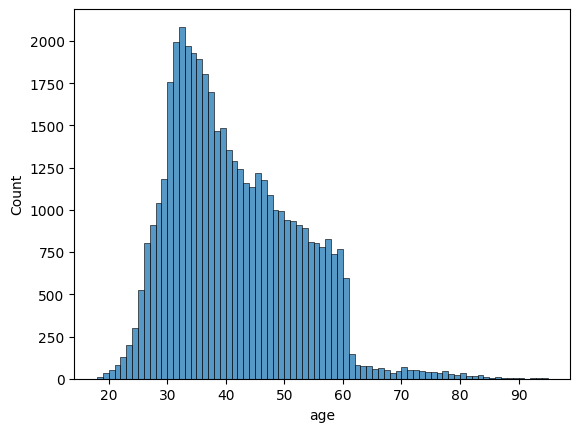

In [635]:
# plotting numerical columns
sns.histplot(data=df, x='age', binwidth=1)

T-tests are statistical tests used to determine if there is a significant difference between the means of two groups. They are widely used when you have numerical data and want to compare means, such as comparing the mean of a sample to a known value or comparing the means of two independent samples.

In [636]:
# Let's say we want to test if the average age of clients in your dataset differs significantly
# from a known average age (population mean) of 40 years.


pop_mean = 40

# Perform one-sample t-test
t_stat, p_value = ttest_1samp(df['age'], pop_mean)

# Output the results
print("One-Sample T-test:")
print("T-statistic:", t_stat)
print("P-value:", p_value)

# The small p-value suggests that there's a significant difference between the sample mean and the hypothesized population mean.

One-Sample T-test:
T-statistic: 18.746558134130538
P-value: 4.0901888078722927e-78


In [637]:
# Paired t-tests are used when we want to compare the means of two related groups or conditions. 
# This test is suitable when the observations are paired or matched in some way, 
# such as before-and-after measurements, repeated measures on the same individuals, or matched pairs.

t_stat_paired, p_value_paired = ttest_rel(df['duration'], df['campaign'])

# Output the results
print("Paired T-test:")
print("T-statistic:", t_stat_paired)
print("P-value:", p_value_paired)

# No related columns in this dataset because the columns are not in the same scope

Paired T-test:
T-statistic: 210.6419051234354
P-value: 0.0


In [638]:

# Example dataset with columns 'before' and 'after' representing paired observations
data = {
    'before': [25, 34, 28, 35, 20],
    'after': [25, 34, 29, 37, 22]
}

# Convert data to a DataFrame
sample = pd.DataFrame(data)

# Perform paired t-test
t_statistic, p_value = ttest_rel(sample['before'], sample['after'])

# Output the results
print("Paired T-test:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

Paired T-test:
T-statistic: -2.23606797749979
P-value: 0.08900934250008564


In [639]:
# # encoding yes/no columns to 0/1
# binary_columns = ['default', 'housing', 'loan', 'y']
# df[binary_columns] = df[binary_columns].replace({'yes': 1, 'no': 0})
# df[binary_columns] = df[binary_columns].astype(int)

In [640]:
# Descretizing age column

age_bins = [0, 20, 30, 40, 50, 60, 70, 80, 96]
age_labels = ['Age-00-19', 'Age-20-29', 'Age-30-39', 'Age-40-49', 'Age-50-59', 'Age-60-69', 'Age-70-79', 'Age-80-95']

df['agerange'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)
df.drop('age', axis = 1, inplace = True)


In [641]:
# Descretizing balance column

balance_labels = ['balanceQ1', 'balanceQ2', 'balanceQ3', 'balanceQ4', 'balanceQ5', 'balanceQ6', 'balanceQ7', 'balanceQ8']
df['balanceQD'] = pd.qcut(df['balance'], q=8, labels=balance_labels)
df.drop('balance', axis = 1, inplace = True)


In [642]:
# Descretizing day column

day_bins = [0, 10, 20, 32]
day_labels = ['Day-00-09', 'Day-10-19', 'Day-20-31']

df['dayrange'] = pd.cut(df['day'], bins=day_bins, labels=day_labels)
df.drop('day', axis = 1, inplace = True)


In [643]:
# ordinally label encoding month column 
label_encoder = LabelEncoder()
df['month'] = df['month'].replace({'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12 })


In [644]:
# Descretizing pdays column

pdays_bins = [-2, 0, 200, 400, 600, 872]
pdays_labels = ['negative', 'pdays-000-199', 'pdays-200-399', 'pdays-400-599', 'pdays-600-871']

df['pdaysrange'] = pd.cut(df['pdays'], bins=pdays_bins, labels=pdays_labels)
df.drop('pdays', axis = 1, inplace = True)

In [645]:
# Descretizing campaign column

campaign_bins = [ 0, 7, 14, 30, 64]
campaign_labels = ['campaign-0-6', 'campaign-7-13', 'campaign-14-29', 'campaign-30-63']

df['campaignrange'] = pd.cut(df['campaign'], bins=campaign_bins, labels=campaign_labels)
df.drop('campaign', axis = 1, inplace = True)

In [646]:
# Descretizing duration column

duration_labels = ['durationQ1', 'durationQ2', 'durationQ3', 'durationQ4', 'durationQ5', 'durationQ6']
df['durationQD'] = pd.qcut(df['duration'], q=6, labels=duration_labels)
df.drop('duration', axis = 1, inplace = True)

In [647]:
# Descretizing previous column

prev_bins = [-1, 0, 5, 10, 276]
prev_labels = ['0prev', 'prev-1-4', 'prev-5-9', 'prev-10-275']

df['prevrange'] = pd.cut(df['previous'], bins=prev_bins, labels=prev_labels)
df.drop('previous', axis = 1, inplace = True)

Text(0.5, 0, 'Values')

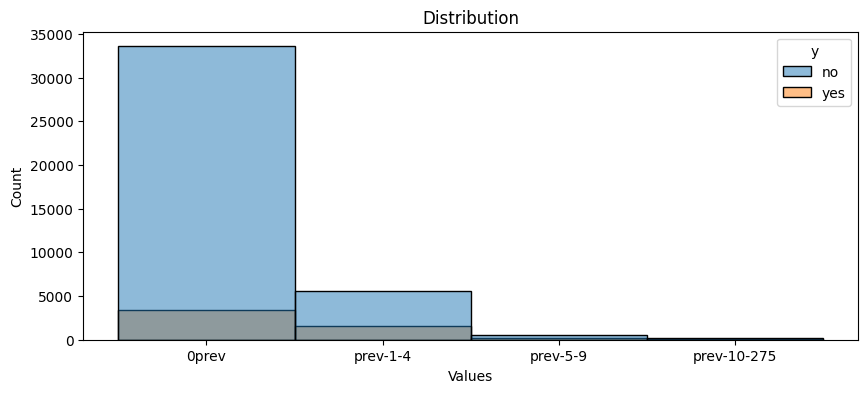

In [648]:
# blotting below data, change x for other columns
plt.figure(figsize=(10,4))

# Histogram
sns.histplot(data=df, x='prevrange', hue='y', binwidth=1)

# Aesthetics
plt.title('Distribution')
plt.xlabel('Values')

In [649]:
# We can see that the higher the campaign number goes, the lower the subscription rate
column_name = 'campaignrange'
counts = df.groupby([column_name, 'y']).size()
totals = df.groupby(column_name).size()
poutcome_percentages = (counts / totals).reset_index(name='percentage')
poutcome_percentages

,campaignrange,y,percentage
0,campaign-0-6,no,0.879320
1,campaign-0-6,yes,0.120680
2,campaign-7-13,no,0.943440
3,campaign-7-13,yes,0.056560
4,campaign-14-29,no,0.971171
5,campaign-14-29,yes,0.028829
6,campaign-30-63,no,0.983051
7,campaign-30-63,yes,0.016949


In [650]:
# We can see that people under 20 and over 60 have a higher chance of subscribing, this can be due to 
# parents subscibing for they children below 20
column_name = 'agerange'
counts = df.groupby([column_name, 'y']).size()
totals = df.groupby(column_name).size()
poutcome_percentages = (counts / totals).reset_index(name='percentage')
poutcome_percentages

,agerange,y,percentage
0,Age-00-19,no,0.659794
1,Age-00-19,yes,0.340206
2,Age-20-29,no,0.839608
3,Age-20-29,yes,0.160392
4,Age-30-39,no,0.897552
5,Age-30-39,yes,0.102448
6,Age-40-49,no,0.909334
7,Age-40-49,yes,0.090666
8,Age-50-59,no,0.899467
9,Age-50-59,yes,0.100533


In [651]:
# We can see that no contact can have a bad effect on subscription
# also, contacting too many times can be futile
column_name = 'prevrange'
counts = df.groupby([column_name, 'y']).size()
totals = df.groupby(column_name).size()
poutcome_percentages = (counts / totals).reset_index(name='percentage')
poutcome_percentages

,prevrange,y,percentage
0,0prev,no,0.908427
1,0prev,yes,0.091573
2,prev-1-4,no,0.774086
3,prev-1-4,yes,0.225914
4,prev-5-9,no,0.706494
5,prev-5-9,yes,0.293506
6,prev-10-275,no,0.816327
7,prev-10-275,yes,0.183673


In [652]:
# We can see that with more call duration, it is more likely for the person to subscribe
column_name = 'durationQD'
counts = df.groupby([column_name, 'y']).size()
totals = df.groupby(column_name).size()
poutcome_percentages = (counts / totals).reset_index(name='percentage')
poutcome_percentages

,durationQD,y,percentage
0,durationQ1,no,0.994915
1,durationQ1,yes,0.005085
2,durationQ2,no,0.972188
3,durationQ2,yes,0.027812
4,durationQ3,no,0.938819
5,durationQ3,yes,0.061181
6,durationQ4,no,0.899854
7,durationQ4,yes,0.100146
8,durationQ5,no,0.854446
9,durationQ5,yes,0.145554


In [653]:
# We can see that the chance of a recurring subscription is much lower if no contact is made.
column_name = 'pdaysrange'
counts = df.groupby([column_name, 'y']).size()
totals = df.groupby(column_name).size()
poutcome_percentages = (counts / totals).reset_index(name='percentage')
poutcome_percentages

,pdaysrange,y,percentage
0,negative,no,0.908427
1,negative,yes,0.091573
2,pdays-000-199,no,0.682315
3,pdays-000-199,yes,0.317685
4,pdays-200-399,no,0.886290
5,pdays-200-399,yes,0.113710
6,pdays-400-599,no,0.472527
7,pdays-400-599,yes,0.527473
8,pdays-600-871,no,0.634615
9,pdays-600-871,yes,0.365385


In [654]:
# no direct correlation here, may be dropped later.
column_name = 'dayrange'
counts = df.groupby([column_name, 'y']).size()
totals = df.groupby(column_name).size()
poutcome_percentages = (counts / totals).reset_index(name='percentage')
poutcome_percentages

,dayrange,y,percentage
0,Day-00-09,no,0.873661
1,Day-00-09,yes,0.126339
2,Day-10-19,no,0.889934
3,Day-10-19,yes,0.110066
4,Day-20-31,no,0.883103
5,Day-20-31,yes,0.116897


In [655]:
# We can see that with more balance, it is more likely for the person to subscribe
column_name = 'balanceQD'
counts = df.groupby([column_name, 'y']).size()
totals = df.groupby(column_name).size()
poutcome_percentages = (counts / totals).reset_index(name='percentage')
poutcome_percentages

,balanceQD,y,percentage
0,balanceQ1,no,0.931044
1,balanceQ1,yes,0.068956
2,balanceQ2,no,0.921476
3,balanceQ2,yes,0.078524
4,balanceQ3,no,0.897095
5,balanceQ3,yes,0.102905
6,balanceQ4,no,0.885031
7,balanceQ4,yes,0.114969
8,balanceQ5,no,0.882540
9,balanceQ5,yes,0.117460


In [656]:
# We can see that with more balance, it is more likely for the person to subscribe
column_name = 'marital'
counts = df.groupby([column_name, 'loan']).size()
totals = df.groupby(column_name).size()
poutcome_percentages = (counts / totals).reset_index(name='percentage')
poutcome_percentages

,marital,loan,percentage
0,divorced,no,0.823123
1,divorced,yes,0.176877
2,married,no,0.828765
3,married,yes,0.171235
4,single,no,0.869977
5,single,yes,0.130023


Hypothesis tests are statistical methods used to make inferences about a population parameter using sample data.

They help in drawing conclusions or making decisions about a population based on the analysis of a sample.

They can assist in EDA by allowing analysts to test assumptions or make comparisons between different groups within the data.

In [657]:
# Null Hypothesis (H0): Marital status has no effect on whether the client has a personal loan.
# Alternative Hypothesis (H1): Marital status has an effect on whether the client has a personal loan.

contingency_table = pd.crosstab(df['marital'], df['loan'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

# The extremely small p-value indicates strong evidence against the null hypothesis,
# suggesting that marital status and having a personal loan are not independent.
# In other words, there is a significant relationship between these variables.



Chi-square Statistic: 121.95253536316297
P-value: 3.298704544931424e-27
Degrees of Freedom: 2
Expected Frequencies:
 [[ 4372.70064807   834.29935193]
 [22853.59620446  4360.40379554]
 [10740.70314746  2049.29685254]]


In [658]:
# Null Hypothesis (H0): The outcome of the previous marketing campaign has no effect on the current target variable (e.g., subscribing to a term deposit).
# Alternative Hypothesis (H1): The outcome of the previous marketing campaign has an effect on the current target variable.

contingency_table = pd.crosstab(df['poutcome'], df['y'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

# The extremely small p-value indicates strong evidence against the null hypothesis,
# suggesting that marital status and having a personal loan are not independent.
# In other words, there is a significant relationship between these variables.

Chi-square Statistic: 4391.5065887686615
P-value: 0.0
Degrees of Freedom: 3
Expected Frequencies:
 [[ 4327.65747274   573.34252726]
 [ 1624.74795957   215.25204043]
 [ 1334.23596028   176.76403972]
 [32635.35860742  4323.64139258]]


In [659]:
# Null Hypothesis (H0): The type of job has no effect on credit default.
# Alternative Hypothesis (H1): The type of job has an effect on credit default.

contingency_table = pd.crosstab(df['job'], df['default'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

# The extremely small p-value indicates strong evidence against the null hypothesis,
# suggesting that marital status and having a personal loan are not independent.
# In other words, there is a significant relationship between these variables.

Chi-square Statistic: 60.34253327054978
P-value: 8.008039925006771e-09
Degrees of Freedom: 11
Expected Frequencies:
 [[5.07778452e+03 9.32154785e+01]
 [9.55656526e+03 1.75434739e+02]
 [1.46019447e+03 2.68055341e+01]
 [1.21764703e+03 2.23529672e+01]
 [9.28750455e+03 1.70495455e+02]
 [2.22318781e+03 4.08121917e+01]
 [1.55053602e+03 2.84639800e+01]
 [4.07911756e+03 7.48824401e+01]
 [9.21091062e+02 1.69089381e+01]
 [7.46005202e+03 1.36947977e+02]
 [1.27951136e+03 2.34886421e+01]
 [2.82808343e+02 5.19165690e+00]]


Chi-square tests are used to determine whether there is a significant association between categorical variables. It assesses whether the observed frequency distribution differs from the expected frequency distribution.

In [660]:
# Null Hypothesis (H0): Marital status has no effect on whether a client subscribes to a term deposit.
# Alternative Hypothesis (H1): Marital status has an effect on whether a client subscribes to a term deposit.

contingency_table = pd.crosstab(df['marital'], df['y'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

# The extremely small p-value indicates strong evidence against the null hypothesis,
# suggesting that marital status and having a personal loan are not independent.
# In other words, there is a significant relationship between these variables.

Chi-square Statistic: 196.49594565603957
P-value: 2.1450999986791792e-43
Degrees of Freedom: 2
Expected Frequencies:
 [[ 4597.86012254   609.13987746]
 [24030.37552808  3183.62447192]
 [11293.76434938  1496.23565062]]


In [661]:
# Null Hypothesis (H0): Education level has no effect on having a personal loan.
# Alternative Hypothesis (H1): Education level has an effect on having a personal loan.


contingency_table = pd.crosstab(df['education'], df['loan'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

# The extremely small p-value indicates strong evidence against the null hypothesis,
# suggesting that marital status and having a personal loan are not independent.
# In other words, there is a significant relationship between these variables.

Chi-square Statistic: 291.37140040027197
P-value: 7.330789568454938e-63
Degrees of Freedom: 3
Expected Frequencies:
 [[ 5753.28829267  1097.71170733]
 [19484.4248966   3717.5751034 ]
 [11169.82740926  2131.17259074]
 [ 1559.45940147   297.54059853]]


In [662]:
# # renaming unknown values
# df['poutcome'] = df['poutcome'].replace('unknown', 'unknown_poutcome')
# df['contact'] = df['contact'].replace('unknown', 'unknown_contact')
# df['job'] = df['job'].replace('unknown', 'unknown_job')
# df['education'] = df['education'].replace('unknown', 'unknown_education')


In [663]:
# # One hot encoding some categorical columns
# cols = ['job', 'marital', 'education', 'poutcome', 'agerange', 'balanceQD', 'dayrange', 'pdaysrange', 'campaignrange', 'durationQD', 'prevrange', 'contact']

# for col in cols:
#     dummies = pd.get_dummies(df[col], dtype=int)
#     df = pd.concat([df, dummies], axis=1)

# df.drop(df[cols], axis=1, inplace=True)

In [664]:
# # dropping unimportant nan values
# df.drop(['unknown_job', 'unknown_education' , 'unknown_contact'], axis = 1, inplace = True)